<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek37.do.txt  -->
<!-- dom:TITLE: Exercises week 37 -->

# Exercises week 37
**Implementing gradient descent for Ridge and ordinary Least Squares Regression**

Date: **September 8-12, 2025**

## Learning goals

After having completed these exercises you will have:
1. Your own code for the implementation of the simplest gradient descent approach applied to ordinary least squares (OLS) and Ridge regression

2. Be able to compare the analytical expressions for OLS and Ridge regression with the gradient descent approach

3. Explore the role of the learning rate in the gradient descent approach and the hyperparameter $\lambda$ in Ridge regression

4. Scale the data properly

## Simple one-dimensional second-order polynomial

We start with a very simple function

$$
f(x)= 2-x+5x^2,
$$

defined for $x\in [-2,2]$. You can add noise if you wish. 

We are going to fit this function with a polynomial ansatz. The easiest thing is to set up a second-order polynomial and see if you can fit the above function.
Feel free to play around with higher-order polynomials.

## Exercise 1, scale your data

Before fitting a regression model, it is good practice to normalize or
standardize the features. This ensures all features are on a
comparable scale, which is especially important when using
regularization. Here we will perform standardization, scaling each
feature to have mean 0 and standard deviation 1.

### 1a)

Compute the mean and standard deviation of each column (feature) in your design/feature matrix $\boldsymbol{X}$.
Subtract the mean and divide by the standard deviation for each feature.

We will also center the target $\boldsymbol{y}$ to mean $0$. Centering $\boldsymbol{y}$
(and each feature) means the model does not require a separate intercept
term, the data is shifted such that the intercept is effectively 0
. (In practice, one could include an intercept in the model and not
penalize it, but here we simplify by centering.)
Choose $n=100$ data points and set up $\boldsymbol{x}, \boldsymbol{y}$ and the design matrix $\boldsymbol{X}$.

In [1]:
import numpy as np
n_features = 2
n = 100
x = np.linspace(-2, 2, n)
y = 2 - x + 5*x**2  +np.random.normal(0, 0.1)

def polynomial_features(x, p, intercept=False):
    n = len(x)
    # Condition on intercept:
    if intercept==True:
        X = np.zeros((n, p + 1))
        for i in range(p+1):
            X[:, i] = x ** i
            # First column becomes ones because for all x, x**i = 1 when i=0.
    else: 
        X = np.zeros((n, p))
        for i in range(p):
            X[:, i] = x ** (i+1)
    
    return X 

X = polynomial_features(x, n_features, intercept = False)


In [2]:
# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = y.mean()
y_centered = y - y_mean

Fill in the necessary details. Do we need to center the $y$-values? 

After this preprocessing, each column of $\boldsymbol{X}_{\mathrm{norm}}$ has mean zero and standard deviation $1$
and $\boldsymbol{y}_{\mathrm{centered}}$ has mean 0. This makes the optimization landscape
nicer and ensures the regularization penalty $\lambda \sum_j
\theta_j^2$ in Ridge regression treats each coefficient fairly (since features are on the
same scale).

## Exercise 1 - Answers
**a)** We should center the y-values if we do not include the intercept. 

## Exercise 2, calculate the gradients

Find the gradients for OLS and Ridge regression using the mean-squared error as cost/loss function.

## Exercise 2 - Answers

### Gradient for OLS

The cost function for OLS is defined as
$$
C(\boldsymbol{\theta}) = \frac{1}{n} \vert\vert\boldsymbol{y} - \boldsymbol{X\theta} \vert\vert _2 ^2 = \frac{1}{n}(\boldsymbol{y}-\boldsymbol{X\theta})^T(\boldsymbol{y}- \boldsymbol{X\theta})
$$

We want to calculate the gradient of $C(\boldsymbol{\theta})$, which is the same as differentiating $C$ with respect to the vector $\boldsymbol{\theta}$:
$$
\nabla_{\boldsymbol{\theta}}C(\boldsymbol{\theta}) = \frac{\partial C(\boldsymbol{\theta})}{\partial\boldsymbol{\theta}} = \frac{\partial}{\partial\boldsymbol{\theta}}\frac{1}{n} (\boldsymbol{y}-\boldsymbol{X\theta})^T(\boldsymbol{y}-\boldsymbol{X\theta}) = \frac{1}{n} \frac{\partial}{\partial\boldsymbol{\theta}}(\boldsymbol{y}-\boldsymbol{X\theta})^T(\boldsymbol{y}-\boldsymbol{X\theta}) = -\frac{2}{n}(\boldsymbol{y}-\boldsymbol{X\theta})^T\boldsymbol{X}
$$

The last calculation is based on the results we showed in the exercises for week 35. 
We end up with: 
$$
\nabla_{\boldsymbol{\theta}}C(\boldsymbol{\theta}) = -\frac{2}{n}(\boldsymbol{y}-\boldsymbol{X\theta})^T\boldsymbol{X}
$$


### Gradient for Ridge regression
The cost function is defined as 
$$
C_{Ridge}(\boldsymbol{\theta}) = \frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_2^2 = \frac{1}{n}((\boldsymbol{y}-\boldsymbol{X\theta})^T(\boldsymbol{y}-\boldsymbol{X\theta})) + \lambda\theta ^T \theta
$$

We now calculate the gradient of $C_{Ridge}(\boldsymbol{\theta})$:
$$
\nabla _{\boldsymbol{\theta}} C_{Ridge}(\boldsymbol{\theta}) = \frac{\partial C_{Ridge}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = \frac{\partial}{\partial\boldsymbol{\theta}}[\frac{1}{n}((\boldsymbol{y}-\boldsymbol{X\theta})^T(\boldsymbol{y}-\boldsymbol{X\theta})) + \lambda\theta ^T \theta]
$$

Using the results from exercises week 36, we get: 
$$
\nabla _{\boldsymbol{\theta}} C_{Ridge}(\boldsymbol{\theta}) = -2(\frac{1}{n}(\boldsymbol{y}-\boldsymbol{X\theta})^T\boldsymbol{X} - \lambda \boldsymbol{\theta}^T) = 2(\frac{1}{n}(\boldsymbol{X\theta}-\boldsymbol{y})^T\boldsymbol{X} + \lambda \boldsymbol{\theta}^T)
$$

### Note to exercise 2:
In these calculations, the gradients are represented as row-vectors. In the notes on github, the gradients are represented by column-vectors. We can easily obtain the column vectors by transposing the results given here:
$$
\nabla _{\boldsymbol{\theta}} C_{Ridge}(\boldsymbol{\theta}) = 2(\frac{1}{n}\boldsymbol{X}^T(\boldsymbol{X\theta}-\boldsymbol{y}) + \lambda \boldsymbol{\theta},
$$
and
$$
\nabla_{\boldsymbol{\theta}}C(\boldsymbol{\theta}) = -\frac{2}{n}\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X\theta}) = \frac{2}{n}\boldsymbol{X}^T(\boldsymbol{X\theta}-\boldsymbol{y})
$$


## Exercise 3, using the analytical formulae for OLS and Ridge regression to find the optimal paramters $\boldsymbol{\theta}$

In [3]:
# Set regularization parameter, either a single value or a vector of values
# Note that lambda is a python keyword. The lambda keyword is used to create small, single-expression functions without a formal name. These are often called "anonymous functions" or "lambda functions."
lam = 1


# Analytical form for OLS and Ridge solution: theta_Ridge = (X^T X + lambda * I)^{-1} X^T y and theta_OLS = (X^T X)^{-1} X^T y
I = np.eye(n_features)
"""
theta_closed_formRidge = ?
theta_closed_formOLS = ?

print("Closed-form Ridge coefficients:", theta_closed_form)
print("Closed-form OLS coefficients:", theta_closed_form)
"""

'\ntheta_closed_formRidge = ?\ntheta_closed_formOLS = ?\n\nprint("Closed-form Ridge coefficients:", theta_closed_form)\nprint("Closed-form OLS coefficients:", theta_closed_form)\n'

This computes the Ridge and OLS regression coefficients directly. The identity
matrix $I$ has the same size as $X^T X$. It adds $\lambda$ to the diagonal of $X^T X$ for Ridge regression. We
then invert this matrix and multiply by $X^T y$. The result
for $\boldsymbol{\theta}$  is a NumPy array of shape (n$\_$features,) containing the
fitted parameters $\boldsymbol{\theta}$.

### 3a)

Finalize, in the above code, the OLS and Ridge regression determination of the optimal parameters $\boldsymbol{\theta}$.

In [4]:
# Will implement using functions:

def theta_closed_formRidge(X, y, lam):
    I = np.eye(n_features)
    return (np.linalg.pinv((X.T@X) + lam * I)) @ (X.T @ y)

def theta_closed_formOLS(X, y):
    return (np.linalg.pinv(X.T@X)) @ X.T @ y

theta_closed_form_Ridge = theta_closed_formRidge(X, y, lam)
theta_closed_form_Ridge_scaled = theta_closed_formRidge(X_norm, y_centered, lam)

theta_closed_form_OLS = theta_closed_formOLS(X, y)
theta_closed_form_OLS_scaled = theta_closed_formOLS(X_norm, y_centered)

print("Closed-form Ridge coefficients:", theta_closed_form_Ridge)
print("Closed-form OLS coefficients:", theta_closed_form_OLS)

print("Closed-form Ridge coefficients, scaled data:", theta_closed_form_Ridge_scaled)
print("Closed-form OLS coefficients, scaled data:", theta_closed_form_OLS_scaled)


Closed-form Ridge coefficients: [-0.99270216  5.85255151]
Closed-form OLS coefficients: [-1.          5.87012592]
Closed-form Ridge coefficients, scaled data: [-1.15475828  6.02217511]
Closed-form OLS coefficients, scaled data: [-1.16630586  6.08239686]


### 3b)

Explore the results as function of different values of the hyperparameter $\lambda$. See for example exercise 4 from week 36.

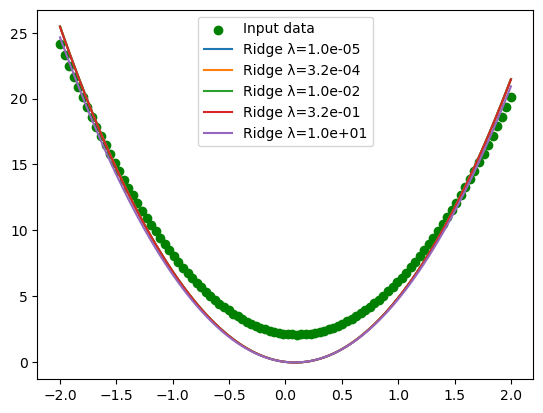

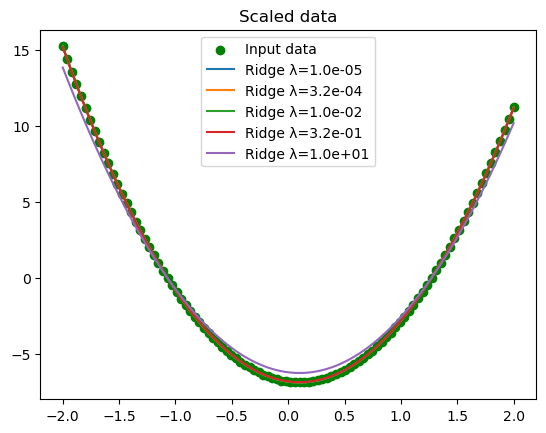

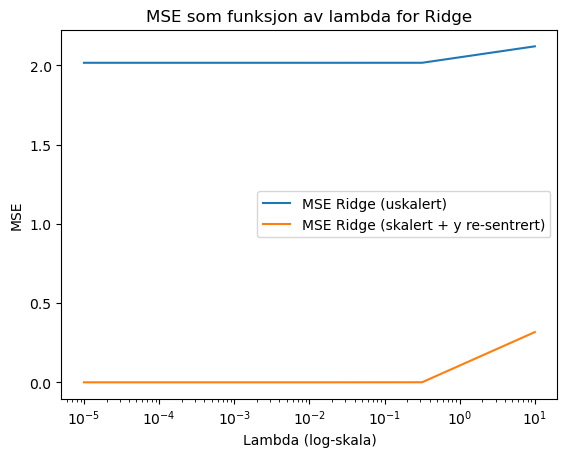

In [5]:
import matplotlib.pyplot as plt
# Will  look at non-scaled data first
plt.scatter(x, y, label = "Input data", color="green")

lam = np.logspace(-5, 1, 5)


for l in lam:
    beta = theta_closed_formRidge(X, y, l)
    plt.plot(x, X @ beta, label = f"Ridge λ={l:.1e}")
plt.legend()
plt.show()

# Now with scaled data
plt.scatter(x, y_centered, label = "Input data", color="green")
for l in lam:
    beta = theta_closed_formRidge(X_norm, y_centered, l)
    plt.plot(x, X_norm @ beta, label = f"Ridge λ={l:.1e}")
plt.legend()
plt.title("Scaled data")
plt.show()

from sklearn.metrics import mean_squared_error

MSE = np.zeros(len(lam))
MSE_scaled = np.zeros(len(lam))

for i, l in enumerate(lam):
    # Unscaled case
    beta = theta_closed_formRidge(X, y, l)
    y_pred = X @ beta
    MSE[i] = mean_squared_error(y, y_pred)

    # Scaled case 
    beta_scaled = theta_closed_formRidge(X_norm, y_centered, l)
    y_pred_scaled_centered = X_norm @ beta_scaled   
    # Re-add the y_mean so both MSE are computed on y --> Better comparison
    y_pred_scaled = y_pred_scaled_centered + y_mean       
    MSE_scaled[i] = mean_squared_error(y, y_pred_scaled)

# Plot
plt.semilogx(lam, MSE, label="MSE Ridge (uskalert)")
plt.semilogx(lam, MSE_scaled, label="MSE Ridge (skalert + y re-sentrert)")
plt.xlabel("Lambda (log-skala)")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE som funksjon av lambda for Ridge")
plt.show()


## Exercise 4, Implementing the simplest form for gradient descent

Alternatively, we can fit the ridge regression model using gradient
descent. This is useful to visualize the iterative convergence and is
necessary if $n$ and $p$ are so large that the closed-form might be
too slow or memory-intensive. We derive the gradients from the cost
functions defined above. Use the gradients of the Ridge and OLS cost functions with respect to
the parameters  $\boldsymbol{\theta}$ and set up (using the template below) your own gradient descent code for OLS and Ridge regression.

Below is a template code for gradient descent implementation of ridge:

In [6]:
"""# Gradient descent parameters, learning rate eta first
eta = 0.1
lam = 1
# Then number of iterations
num_iters = 1000

# Initialize weights for gradient descent
theta_gdOLS = np.zeros(n_features)
theta_gdRidge = np.zeros(n_features)
# Gradient descent loop
for t in range(num_iters):
    # Compute gradients for OSL and Ridge
    grad_OLS = 2/n * X.T @ (X @ theta_gdOLS - y)
    grad_Ridge = 2 * (1/n * X.T @ (X @ theta_gdRidge - y) + lam*theta_gdRidge)
    # Update parameters theta
    theta_gdOLS = theta_gdOLS - eta*grad_OLS
    theta_gdRidge = theta_gdRidge - eta * grad_Ridge

# After the loop, theta contains the fitted coefficients
print("Gradient Descent OLS coefficients:", theta_gdOLS)
print("Gradient Descent Ridge coefficients:", theta_gdRidge)"""

'# Gradient descent parameters, learning rate eta first\neta = 0.1\nlam = 1\n# Then number of iterations\nnum_iters = 1000\n\n# Initialize weights for gradient descent\ntheta_gdOLS = np.zeros(n_features)\ntheta_gdRidge = np.zeros(n_features)\n# Gradient descent loop\nfor t in range(num_iters):\n    # Compute gradients for OSL and Ridge\n    grad_OLS = 2/n * X.T @ (X @ theta_gdOLS - y)\n    grad_Ridge = 2 * (1/n * X.T @ (X @ theta_gdRidge - y) + lam*theta_gdRidge)\n    # Update parameters theta\n    theta_gdOLS = theta_gdOLS - eta*grad_OLS\n    theta_gdRidge = theta_gdRidge - eta * grad_Ridge\n\n# After the loop, theta contains the fitted coefficients\nprint("Gradient Descent OLS coefficients:", theta_gdOLS)\nprint("Gradient Descent Ridge coefficients:", theta_gdRidge)'

### 4a)

Write first a gradient descent code for OLS only using the above template.
Discuss the results as function of the learning rate parameters and the number of iterations

### 4b)

Write then a similar code for Ridge regression using the above template.
Try to add a stopping parameter as function of the number iterations and the difference between the new and old $\theta$ values. How would you define a stopping criterion?

## Exercise 4 - answers
**a)**

In [7]:
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 1
# Then number of iterations
num_iters = 1000
# Initialize weights for gradient descent
theta_gdOLS = np.zeros(n_features)

# Gradient descent loop
for t in range(num_iters):
    # Compute gradients for OSL and Ridge
    grad_OLS = 2/n * X.T @ (X @ theta_gdOLS - y)
    # Update parameters theta
    theta_gdOLS = theta_gdOLS - eta*grad_OLS

# After the loop, theta contains the fitted coefficients
print("Gradient Descent OLS coefficients:", theta_gdOLS)

# Function:
def grad_descent_ols(X, y, eta=0.01, num_iters=1000):
    n_samples, n_features = X.shape
    theta_gdOLS = np.zeros(n_features)
    for t in range(num_iters):
        # Compute gradients for OSL and Ridge
        grad_OLS = 2/n_samples * X.T @ (X @ theta_gdOLS - y)
        # Update parameters theta
        theta_gdOLS = theta_gdOLS - eta*grad_OLS
    return theta_gdOLS

Gradient Descent OLS coefficients: [-1.          5.87012592]


For small $\eta$, the step size is small, so the number of iterations must be large if we want convergence. And if $\eta$ is to big, we may overshoot the solution, so we get either oscillation or divergence. If we use too few iterations, we may not reach the solution, and if we have too many iterations, we may iterate even if we have found a solution. This is a waste of computer power, so we should add a stopping criterion. 

**b)**

In [8]:
def grad_descent_ridge(X, y, eta=0.01, lam=1, num_iters=1000, print_num_iters = False):
    n_samples, n_features = X.shape
    theta_gdRidge = np.zeros(n_features)
    for t in range(num_iters):
        grad_Ridge = 2 * (1/n_samples * X.T @ (X @ theta_gdRidge - y) + lam*theta_gdRidge)
        theta_gdRidge_new = theta_gdRidge - eta * grad_Ridge
        # stopping criterion, return number of iterations?
        if np.allclose(theta_gdRidge, theta_gdRidge_new, rtol=1e-12, atol=1e-12):
            if print_num_iters:
                print("Number of iterations: ", t+1)
            return theta_gdRidge_new
        else: theta_gdRidge = theta_gdRidge_new
        
    if print_num_iters:
        print("Number of iterations: ", t+1)
    return theta_gdRidge


print(grad_descent_ridge(X, y, num_iters=10000, print_num_iters=True))

    

Number of iterations:  489
[-0.57631954  4.51448711]


I made a stopping criterion by checking if the previous and current iterations are "equal", with a tolerance of $10^{-12}$. By printing the number of iterations we see that this stopping criterion reduces the number of iterations from 1000 to 489. 

## Exercise 5, Ridge regression and a new Synthetic Dataset

We create a synthetic linear regression dataset with a sparse
underlying relationship. This means we have many features but only a
few of them actually contribute to the target. In our example, we’ll
use 10 features with only 3 non-zero weights in the true model. This
way, the target is generated as a linear combination of a few features
(with known coefficients) plus some random noise. The steps we include are:

Decide on the number of samples and features (e.g. 100 samples, 10 features).
Define the **true** coefficient vector with mostly zeros (for sparsity). For example, we set $\hat{\boldsymbol{\theta}} = [5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0]$, meaning only features 0, 1, and 6 have a real effect on y.

Then we sample feature values for $\boldsymbol{X}$ randomly (e.g. from a normal distribution). We use a normal distribution so features are roughly centered around 0.
Then we compute the target values $y$ using the linear combination $\boldsymbol{X}\hat{\boldsymbol{\theta}}$ and add some noise (to simulate measurement error or unexplained variance).

Below is the code to generate the dataset:

In [9]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Define dataset size
n_samples = 100
n_features = 10

# Define true coefficients (sparse linear relationship)
theta_true = np.array([5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0])

# Generate feature matrix X (n_samples x n_features) with random values
X = np.random.randn(n_samples, n_features)  # standard normal distribution

# Generate target values y with a linear combination of X and theta_true, plus noise
noise = 0.5 * np.random.randn(n_samples)    # Gaussian noise
y = X @ theta_true + noise

This code produces a dataset where only features 0, 1, and 6
significantly influence $\boldsymbol{y}$. The rest of the features have zero true
coefficient. For example, feature 0 has
a true weight of 5.0, feature 1 has -3.0, and feature 6 has 2.0, so
the expected relationship is:

$$
y \approx 5 \times x_0 \;-\; 3 \times x_1 \;+\; 2 \times x_6 \;+\; \text{noise}.
$$

You can remove the noise if you wish to. 

Try to fit the above data set using OLS and Ridge regression with the analytical expressions and your own gradient descent codes.

If everything worked correctly, the learned coefficients should be
close to the true values [5.0, -3.0, 0.0, …, 2.0, …] that we used to
generate the data. Keep in mind that due to regularization and noise,
the learned values will not exactly equal the true ones, but they
should be in the same ballpark.  Which method (OLS or Ridge) gives the best results?

In [10]:
### Closed form (analytical) ###

# OLS
theta_closed_form_OLS = theta_closed_formOLS(X, y)
print("OLS, analytical: ", theta_closed_form_OLS)

# Ridge
lam = 10
theta_closed_form_Ridge = theta_closed_formRidge(X, y, lam)
print("Ridge, analytical: ", theta_closed_form_Ridge)

### Gradient descent methods ###

# OlS
theta_gd_OLS = grad_descent_ols(X, y, eta=0.01, num_iters=1000)
print("OLS, gradient descent: ", theta_gd_OLS)

# Ridge
theta_gd_Ridge = grad_descent_ridge(X, y, eta=0.01, lam=lam/n_samples, num_iters=10000)
# Divide lambda by n_samples to match the averaged-loss gradient descent formulation with the unnormalized closed-form solution
print("Ridge, gradient descent: ", theta_gd_Ridge)



OLS, analytical:  [ 5.00905318e+00 -3.00383337e+00 -1.62718294e-02  1.44819819e-01
 -7.16006510e-02 -4.29656382e-02  2.05558117e+00  1.97583716e-03
  4.11922237e-02 -5.10225177e-02]
Ridge, analytical:  [ 4.56106741 -2.64148866 -0.01936493  0.19520454 -0.14478433 -0.10738721
  1.81651125  0.02712845 -0.03893845 -0.05635541]
OLS, gradient descent:  [ 5.00905157e+00 -3.00382494e+00 -1.62706238e-02  1.44824450e-01
 -7.16068680e-02 -4.29716690e-02  2.05557277e+00  1.97480991e-03
  4.11906176e-02 -5.10223147e-02]
Ridge, gradient descent:  [ 4.56106741 -2.64148866 -0.01936493  0.19520454 -0.14478433 -0.10738721
  1.81651125  0.02712845 -0.03893845 -0.05635541]


### Comparing the different results
To find out which method "works best", i will first calculate the coefficient errors compared to the true value of $\hat{\boldsymbol{\theta}}$. I will use the 2-norm to do this. Then, I will check if the values that should be zero, are in fact zero, within a chosen threshold.

In [11]:
def coef_error(theta_true, theta_hat):
    l2 = np.linalg.norm(theta_true - theta_hat)
    return l2

def is_zero(theta_true, theta_hat, threshold = 1e-1):
    zero_idx = np.isclose(theta_true, 0)
    result = np.full(theta_true.shape, np.nan, dtype=object)
    result[zero_idx] = np.isclose(theta_hat[zero_idx], 0, atol=threshold)
    return result

l2_OLS_closed= coef_error(theta_true=theta_true, theta_hat=theta_closed_form_OLS)
l2_OLS_gd = coef_error(theta_true=theta_true, theta_hat=theta_gd_OLS)
l2_Ridge_closed= coef_error(theta_true=theta_true, theta_hat=theta_closed_form_Ridge)
l2_Ridge_gd= coef_error(theta_true=theta_true, theta_hat=theta_gd_Ridge)
### Printing results ###
print("L2 error, OLS, analytical: ", l2_OLS_closed)
print("L2 error, OLS, gradient descent: ", l2_OLS_gd)
print("L2 error, Ridge, analytical: ", l2_Ridge_closed)
print("L2 error, Ridge, gradient descent: ", l2_Ridge_gd)

### Checking the features with value 0 in theta_true has value 0 in the computed thetas
is_zero_OLS_closed = is_zero(theta_true=theta_true, theta_hat=theta_closed_form_OLS)
is_zero_OLS_gd = is_zero(theta_true=theta_true, theta_hat=theta_gd_OLS)
is_zero_Ridge_closed = is_zero(theta_true=theta_true, theta_hat=theta_closed_form_Ridge)
is_zero_Ridge_gd = is_zero(theta_true=theta_true, theta_hat=theta_gd_Ridge)

### Printing results ###
print("Zero values are zero, OLS, analytical: ")
print(is_zero_OLS_closed)
print("Zero values are zero, OLS, gradient descent: ")
print(is_zero_OLS_gd)
print("Zero values are zero, Ridge, analytical: ")
print(is_zero_Ridge_closed)
print("Zero values are zero, Ridge, gradient descent: ")
print(is_zero_Ridge_gd)

                
    

L2 error, OLS, analytical:  0.18894489422446897
L2 error, OLS, gradient descent:  0.18894893359947187
L2 error, Ridge, analytical:  0.6567059732670212
L2 error, Ridge, gradient descent:  0.6567059734014327
Zero values are zero, OLS, analytical: 
[nan nan True False True True nan True True True]
Zero values are zero, OLS, gradient descent: 
[nan nan True False True True nan True True True]
Zero values are zero, Ridge, analytical: 
[nan nan True False False False nan True True True]
Zero values are zero, Ridge, gradient descent: 
[nan nan True False False False nan True True True]


With our current low-noise dataset, OLS recovers the true coefficients more accurately than Ridge, especially at larger $\lambda$, which introduces bias. This is expected: Ridge trades bias for variance reduction. In a noisier or more correlated dataset, Ridge’s regularization would typically yield lower test error and more stable coefficients.